## Code to build some graphs out of the OSS Data

### Data from repo-list.csv

In [40]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import re
from wordcloud import WordCloud
from functools import lru_cache

In [41]:
data = pd.read_csv('./mongodb_csv_dump/repo-list.csv')

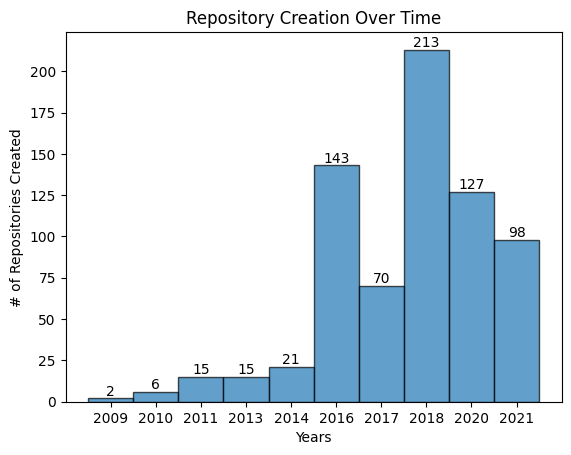

In [42]:
# number of repo.'s created over the years
data_by_year = data.sort_values(by='created_at', ascending=True)
Years_create = data_by_year['created_at'].str.extract(r'(\d{4})')

n, bins, patches = plt.hist(Years_create, bins=10, edgecolor='black', alpha=0.7)
plt.title('Repository Creation Over Time')
plt.xlabel('Years')
plt.ylabel('# of Repositories Created')

# Set x-axis tick positions to the midpoint of each bar
midpoints = [(a + b) / 2 for a, b in zip(bins[:-1], bins[1:])]
plt.xticks(midpoints)

for count, patch in zip(n, patches):
    if count > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, count, str(int(count)), ha='center', va='bottom')

plt.show()

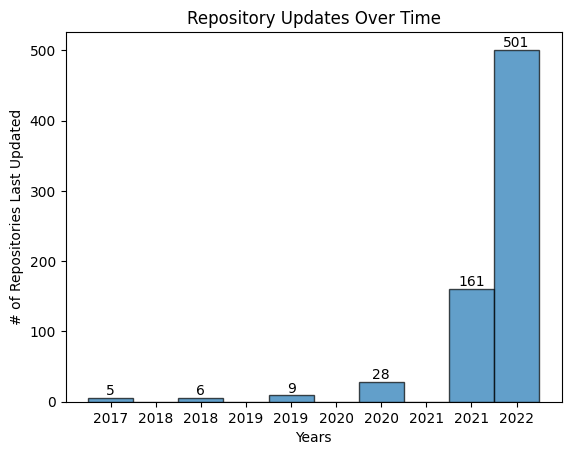

In [43]:
# When the last update was according to the data 
data_by_year = data.sort_values(by='updated_at', ascending=True)
Years_update = data_by_year['updated_at'].str.extract(r'(\d{4})')

n, bins, patches = plt.hist(Years_update, bins=10, edgecolor='black', alpha=0.7)
plt.title('Repository Updates Over Time')
plt.xlabel('Years')
plt.ylabel('# of Repositories Last Updated')

# Set x-axis tick positions to the midpoint of each bar
midpoints = [(a + b) / 2 for a, b in zip(bins[:-1], bins[1:])]
plt.xticks(midpoints)

for count, patch in zip(n, patches):
    if count > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, count, str(int(count)), ha='center', va='bottom')
        
plt.show()

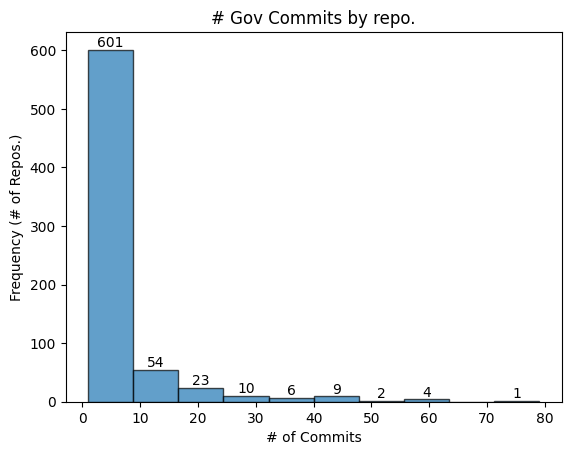

In [44]:
# W
n, bins, patches = plt.hist(data['num_gov_commits'], bins=10, edgecolor='black', alpha=0.7)
plt.title('# Gov Commits by repo.')
plt.xlabel('# of Commits')
plt.ylabel('Frequency (# of Repos.)')

# midpoints = [(a + b) / 2 for a, b in zip(bins[:-1], bins[1:])]
# plt.xticks(midpoints)

# Add labels to the bars
for count, patch in zip(n, patches):
    if count > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, count, str(int(count)), ha='center', va='bottom')

plt.show()

### Data from governance-change-commit.csv

In [45]:
data_gov = pd.read_csv('./mongodb_csv_dump/governance-change-commit.csv')

In [46]:
commit_counts = data_gov.groupby('repository.nameWithOwner').size().reset_index(name='Commit_Count')
print(commit_counts)

repo_with_atleast_three_commits = (commit_counts['Commit_Count'] >= 3).sum()
print("Number of repos with three or more commit: {}".format(repo_with_atleast_three_commits))
repo_with_atleast_three_commits = (commit_counts['Commit_Count'] == 2).sum()
print("Number of repos with just two commit: {}".format(repo_with_atleast_three_commits))
repo_with_atleast_one_commits = (commit_counts['Commit_Count'] == 1).sum()
print("Number of repos with just one commit: {}".format(repo_with_atleast_one_commits))

                          repository.nameWithOwner  Commit_Count
0                    AI-CAMEL/Skills-Specification             2
1                         ARM-software/vktrace-arm             2
2            AcademySoftwareFoundation/OpenColorIO            10
3    AcademySoftwareFoundation/OpenShadingLanguage             6
4    AcademySoftwareFoundation/aswf-sample-project             1
..                                             ...           ...
705                                  yarnpkg/berry             1
706                                      yfii/docs             2
707                     zarr-developers/governance            21
708                              zellij-org/zellij             9
709                   zhenhaitapei/zhap_metrics_ui             8

[710 rows x 2 columns]
Number of repos with three or more commit: 324
Number of repos with just two commit: 122
Number of repos with just one commit: 264


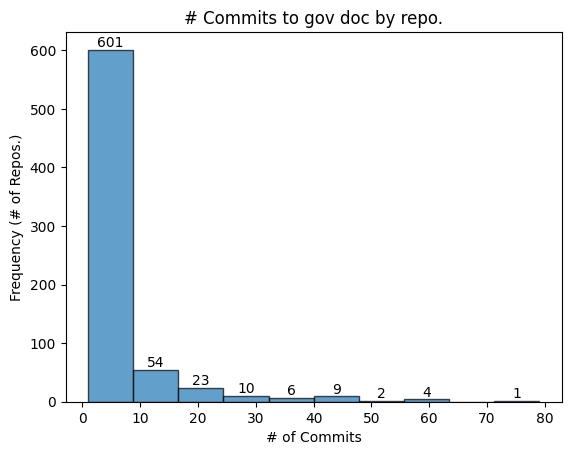

In [47]:
n, bins, patches = plt.hist(commit_counts['Commit_Count'], bins=10, edgecolor='black', alpha=0.7)
plt.title('# Commits to gov doc by repo.')
plt.xlabel('# of Commits')
plt.ylabel('Frequency (# of Repos.)')

# Add labels to the bars
for count, patch in zip(n, patches):
    if count > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, count, str(int(count)), ha='center', va='bottom')

### Build a CSV list of all URLS found

In [48]:
collections_status = pd.read_csv('./mongodb_csv_dump/collection-status.csv')
commit_list = pd.read_csv('./mongodb_csv_dump/commit-list.csv')
governance_change_commit_by_section = pd.read_csv('./mongodb_csv_dump/governance-change-commit-by-section.csv')
governance_change_commit = pd.read_csv('./mongodb_csv_dump/governance-change-commit.csv')
issue_list = pd.read_csv('./mongodb_csv_dump/issue-list.csv')
latest_governance_file_content_by_section = pd.read_csv('./mongodb_csv_dump/latest-governance-file-content-by-section.csv')
latest_governance_file_content = pd.read_csv('./mongodb_csv_dump/latest-governance-file-content.csv')
repo_list = pd.read_csv('./mongodb_csv_dump/repo-list.csv')

/var/folders/52/s8jxyj5n0wz6vrg4m1jw41mh0000gn/T/ipykernel_14765/1469719581.py:5: DtypeWarning: Columns (5,6,12,13,14,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  issue_list = pd.read_csv('./mongodb_csv_dump/issue-list.csv')


In [49]:

df_list = [collections_status, commit_list, governance_change_commit_by_section, governance_change_commit, issue_list, latest_governance_file_content_by_section, latest_governance_file_content, repo_list]


# Create an empty list to store unique URLs
unique_urls = []

# Iterate through each DataFrame in the list

for df in df_list:
    for column in df.columns:
        # Extract URLs from the text within each cell
        url_pattern = r'(https?://\S+)'
        urls_in_df = df[column].apply(lambda x: re.findall(url_pattern, str(x)))
        
        # Append the URLs to the list
        unique_urls.extend(urls_in_df)

# Flatten the list of URLs and remove duplicates
unique_urls = list(set(url for sublist in unique_urls for url in sublist))

# Create a new DataFrame with unique URLs
unique_urls_df = pd.DataFrame({'URLs': unique_urls})

# Reset the index of the new DataFrame
unique_urls_df.reset_index(drop=True, inplace=True)

print(unique_urls_df)

                                                      URLs
0        https://github.com/grpc/grpc-go/commit/6d6c041...
1        https://github.com/appium/appium/issues/1301#i...
2        https://github.com/backstage/backstage/blob/ma...
3        https://docs.portworx.com/portworx-install-wit...
4        https://github.com/vmware-tanzu/velero/issues/...
...                                                    ...
3648876  https://github.com/sfztools/sfizz/issues/7#iss...
3648877            https://10.96.99.61:18003/v1/raft\nThis
3648878  https://github.com/nats-io/nats.go/commit/128e...
3648879  https://github.com/prebid/Prebid.js/commit/af3...
3648880  https://github.com/spotbugs/spotbugs/commit/72...

[3648881 rows x 1 columns]


### Number of words in the newsest/oldest commit of each Gov file

In [50]:
# Getting into contents, produce two histograms, showing the number of words in the oldest and newest versions of each gov.md file
# make bar plots

def count_words(cell_content):
    words = str(cell_content).split()
    return len(words)

# Filter the rows with the specific date and the contents on the earliest and latest dates

earliest_commits = governance_change_commit.groupby('repository.nameWithOwner')['committedDate'].min()
latest_commits = governance_change_commit.groupby('repository.nameWithOwner')['committedDate'].max()

earliest_latest_df = pd.DataFrame({
    'Repository': earliest_commits.index,
    'EarliestCommit': earliest_commits.values,
    'LatestCommit': latest_commits.values
})

data_e = latest_governance_file_content[latest_governance_file_content['committedDate'].isin(earliest_latest_df['EarliestCommit'])]
data_l = latest_governance_file_content[latest_governance_file_content['committedDate'].isin(earliest_latest_df['LatestCommit'])]

earliest_latest_content_df = pd.DataFrame({
    'Repository': earliest_commits.index,
    'EarliestContent' : data_e['content'],
    'LatestContent' : data_l['content']
})

earliest_latest_content_df['EarliestWordCount'] = earliest_latest_content_df['EarliestContent'].apply(lambda x: count_words(x))
earliest_latest_content_df['LatestWordCount'] = earliest_latest_content_df['LatestContent'].apply(lambda x: count_words(x))

# earliest_latest_content_df['EarliestContent'] = earliest_latest_content_df['EarliestContent'].str.replace(r'^#+\s', '', regex=True)
# earliest_latest_content_df['EarliestContent'] = earliest_latest_content_df['EarliestContent'].str.replace(r'\n', '', regex=True)

# Display the modified DataFrame
# print(earliest_latest_content_df['EarliestContent'])


0      # BFE Governance\n\n## Principles\n\nThe BFE c...
1                                                    NaN
2                                                    NaN
3      # Project Governance\n\nThis document describe...
4                                                    NaN
                             ...                        
705    *NOTE: This document is intended to provide an...
706                                                  NaN
707                                                  NaN
708    This is a OpenEBS sub project and abides by th...
709                                                  NaN
Name: EarliestContent, Length: 710, dtype: object


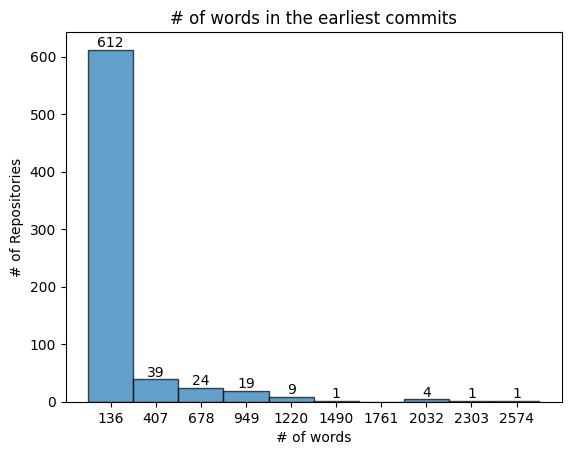

In [51]:
# graph the data

n, bins, patches = plt.hist(earliest_latest_content_df['EarliestWordCount'], bins=10, edgecolor='black', alpha=0.7)
plt.title('# of words in the earliest commits')
plt.xlabel('# of words')
plt.ylabel('# of Repositories')

# Set x-axis tick positions to the midpoint of each bar
midpoints = [(a + b) / 2 for a, b in zip(bins[:-1], bins[1:])]
plt.xticks(midpoints)

for count, patch in zip(n, patches):
    if count > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, count, str(int(count)), ha='center', va='bottom')
        
plt.show()

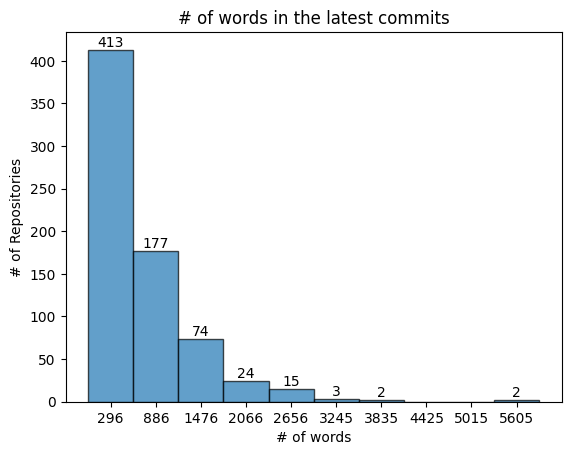

In [52]:
# graph the data

n, bins, patches = plt.hist(earliest_latest_content_df['LatestWordCount'], bins=10, edgecolor='black', alpha=0.7)
plt.title('# of words in the latest commits')
plt.xlabel('# of words')
plt.ylabel('# of Repositories')

# Set x-axis tick positions to the midpoint of each bar
midpoints = [(a + b) / 2 for a, b in zip(bins[:-1], bins[1:])]
plt.xticks(midpoints)

for count, patch in zip(n, patches):
    if count > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, count, str(int(count)), ha='center', va='bottom')
        
plt.show()

### Produce Word Clouds

In [195]:
def buildWordCloud(heading_list):    
    text = ' '' '.join(' '.join(inner_list) for inner_list in heading_list)
    wordcloud = WordCloud(
        background_color='white',
        width=800,
        height=400,
        max_words=200,  # Adjust this value as needed
        colormap='viridis',  # You can choose a different color map
        contour_color='black',  # Outline color
        contour_width=1  # Outline width
    )
    wordcloud.generate(text)

    # Display the generated Word Cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

HEADING 1


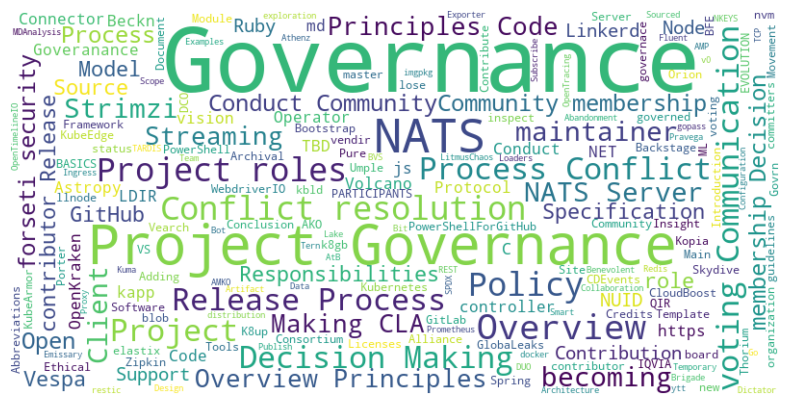

HEADING 2


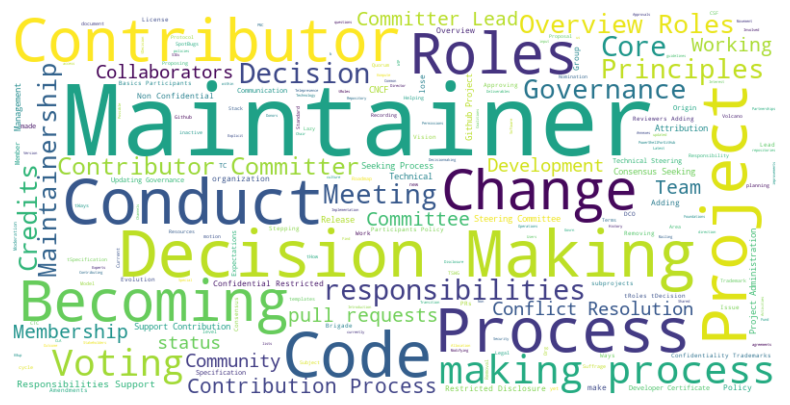

HEADING 3


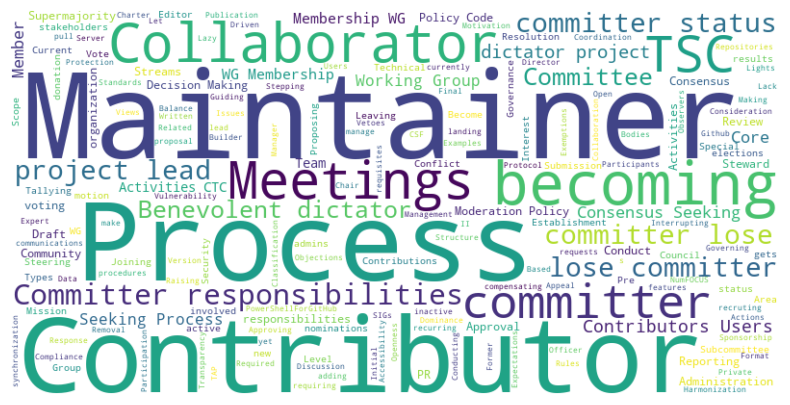

HEADING 4


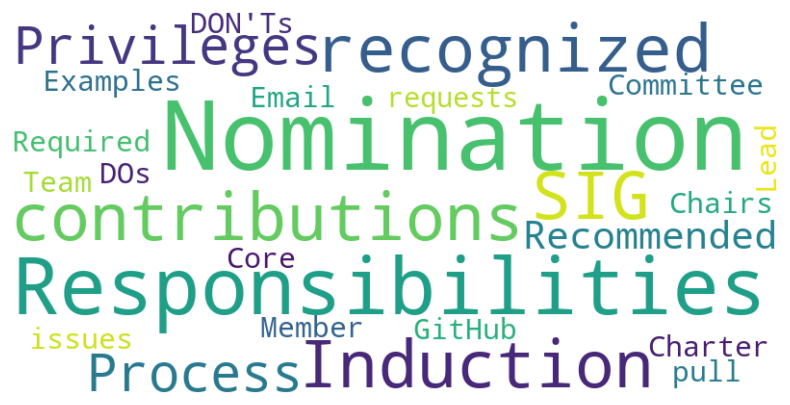

In [203]:
# Heading: #
pattern = re.compile(r'# .*')
list_h1 = []
for string in earliest_latest_content_df['EarliestContent'].dropna():
    string = str(string)
    headings = string.split(r'\n')
    h = [s for s in headings if pattern.match(s)]
    list_h1.append(h)


# Heading: ##
pattern = re.compile(r'## .*')
list_h2 = []
for string in earliest_latest_content_df['EarliestContent'].dropna():
    string = str(string)
    headings = string.split(r'\n')
    h = [s for s in headings if pattern.match(s)]
    list_h2.append(h)


# Heading: ###
pattern = re.compile(r'### .*')
list_h3 = []
for string in earliest_latest_content_df['EarliestContent'].dropna():
    string = str(string)
    headings = string.split(r'\n')
    h = [s for s in headings if pattern.match(s)]
    list_h3.append(h)


# Heading: ####
pattern = re.compile(r'#### .*')
list_h4 = []
for string in earliest_latest_content_df['EarliestContent'].dropna():
    string = str(string)
    headings = string.split(r'\n')
    h = [s for s in headings if pattern.match(s)]
    list_h4.append(h)

print("HEADING 1")
buildWordCloud(list_h1)
print("HEADING 2") 
buildWordCloud(list_h2)
print("HEADING 3")
buildWordCloud(list_h3)
print("HEADING 4") 
buildWordCloud(list_h4)

HEADING 1


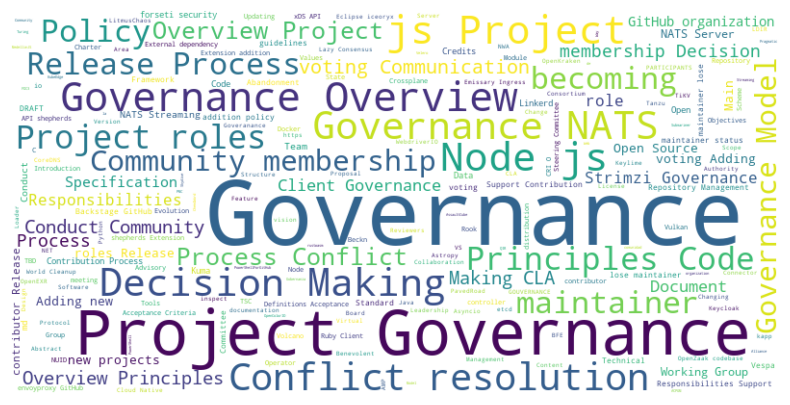

HEADING 2


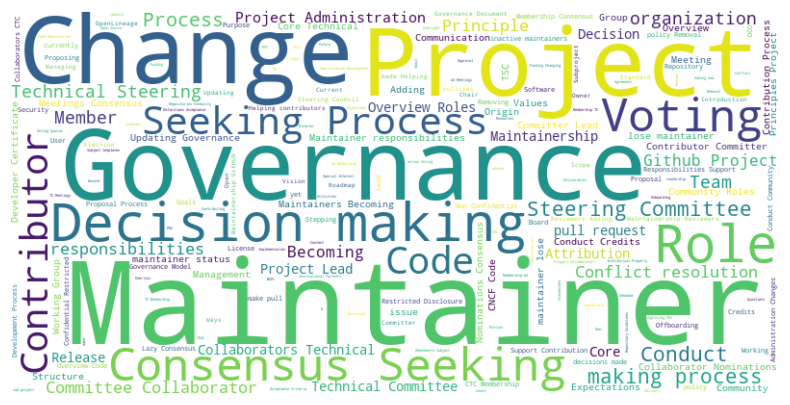

HEADING 3


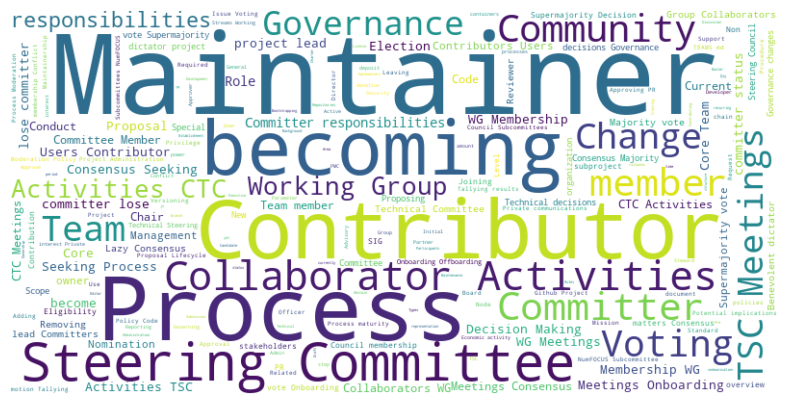

HEADING 4


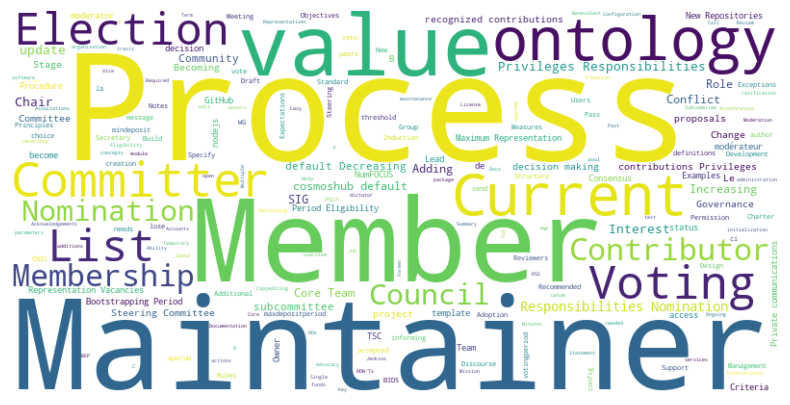

In [202]:
# Heading: #
pattern = re.compile(r'# .*')
list_h1 = []
for string in earliest_latest_content_df['LatestContent'].dropna():
    string = str(string)
    headings = string.split(r'\n')
    h = [s for s in headings if pattern.match(s)]
    list_h1.append(h)


# Heading: ##
pattern = re.compile(r'## .*')
list_h2 = []
for string in earliest_latest_content_df['LatestContent'].dropna():
    string = str(string)
    headings = string.split(r'\n')
    h = [s for s in headings if pattern.match(s)]
    list_h2.append(h)


# Heading: ###
pattern = re.compile(r'### .*')
list_h3 = []
for string in earliest_latest_content_df['LatestContent'].dropna():
    string = str(string)
    headings = string.split(r'\n')
    h = [s for s in headings if pattern.match(s)]
    list_h3.append(h)


# Heading: ####
pattern = re.compile(r'#### .*')
list_h4 = []
for string in earliest_latest_content_df['LatestContent'].dropna():
    string = str(string)
    headings = string.split(r'\n')
    h = [s for s in headings if pattern.match(s)]
    list_h4.append(h)

print("HEADING 1")
buildWordCloud(list_h1)
print("HEADING 2") 
buildWordCloud(list_h2)
print("HEADING 3")
buildWordCloud(list_h3)
print("HEADING 4") 
buildWordCloud(list_h4)

#### Word cloud for the earliest and latest content without headings

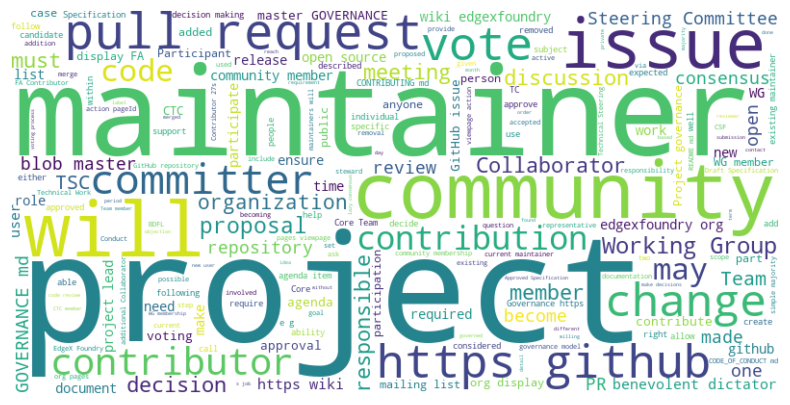

In [208]:
pattern = re.compile(r'^(?!#\s|##\s|###\s|####\s).*$')
list_wo_h = []
for string in earliest_latest_content_df['EarliestContent'].dropna():
    string = str(string)
    headings = string.split(r'\n')
    h = [s for s in headings if pattern.match(s)]
    list_wo_h.append(h)

buildWordCloud(list_wo_h)

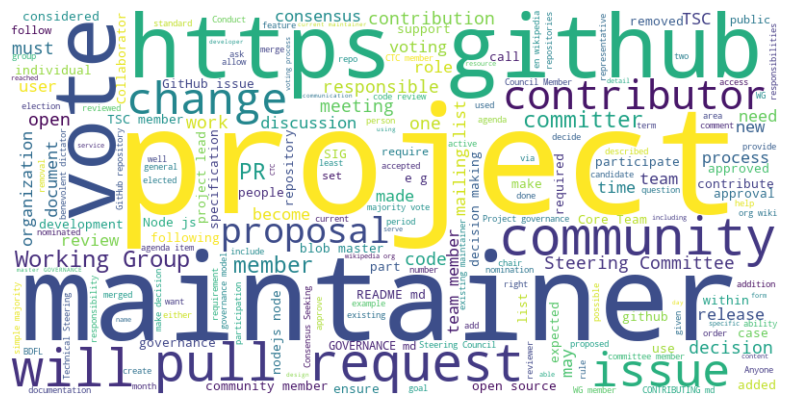

In [209]:
pattern = re.compile(r'^(?!#\s|##\s|###\s|####\s).*$')
list_wo_h = []
for string in earliest_latest_content_df['LatestContent'].dropna():
    string = str(string)
    headings = string.split(r'\n')
    h = [s for s in headings if pattern.match(s)]
    list_wo_h.append(h)

buildWordCloud(list_wo_h)

## Bar Plots of # commits to repos